In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 少数第三位まで表示
%precision 3

'%.3f'

In [2]:
from sklearn import linear_model

In [3]:
pwd

'/Users/mizumototakafumi/workspace/python/data_scientist/chap3'

In [4]:
## 1-4 zipファイルとファイルをダウンロードするためのライブラリ

import requests, zipfile
from io import StringIO
import io

In [5]:
## 1-5 zipファイルをDLして展開

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [6]:
ls

3-1.ipynb        student-merge.R  student.txt
student-mat.csv  student-por.csv


In [10]:
## 2-1データをDataFrameとして読み込む

student_data_math = pd.read_csv('student-mat.csv')

In [8]:
## 2-2データを確認する

student_data_math.head()

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                                                                                                                                                                                 
4  GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"h...

In [14]:
## 2-3カンマで区切ってデータを読む

student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [16]:
student_data_math.head()

school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]

In [17]:
### 3 データの性質を確認する
## 3-1 データの個数や型を確認する
# すべてのカラムの情報などチェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [18]:
### 4 量的データと質的データ
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [19]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [20]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

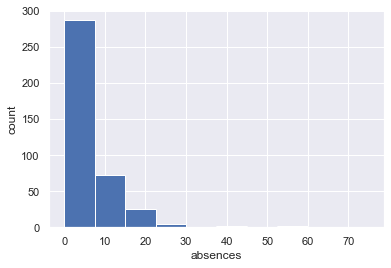

In [21]:
#### Chap3-3
### 1 ヒストグラム

# データの指定
plt.hist(student_data_math['absences'])

# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドをつける
plt.grid(True)